In [1]:
from IPython.display import HTML
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# Week Nine: Hypothesis Testing II

# Recap

* Last week, we went over a few different scenarios where a hypothesis test would be useful.
* In these scenarios, we wanted to test the mean of a series of samples versus a hypothesized population mean.
* We use a **z-test** when we know the variance of the underlying distribution
* We use the **t-test** when we do not know the variance of the underlying distribution OR there are less than thirty samples in the underlying distribution.
* In **all cases** for a hypothesis test, we assume the underlying distribution is normal.

# Z-Test

* With a **Z-test**, we are testing whether our observed data could conceivably come from a stated distribution.
* The **null hypothesis** is that our observations could conceivably come from the stated distribution.
* The **alternate hypothesis** is that our observations could not conceivably come from the stated distribution.

* Say that IQ for the general population is normally distributed with a mean of 100 and a standard deviation of 15.

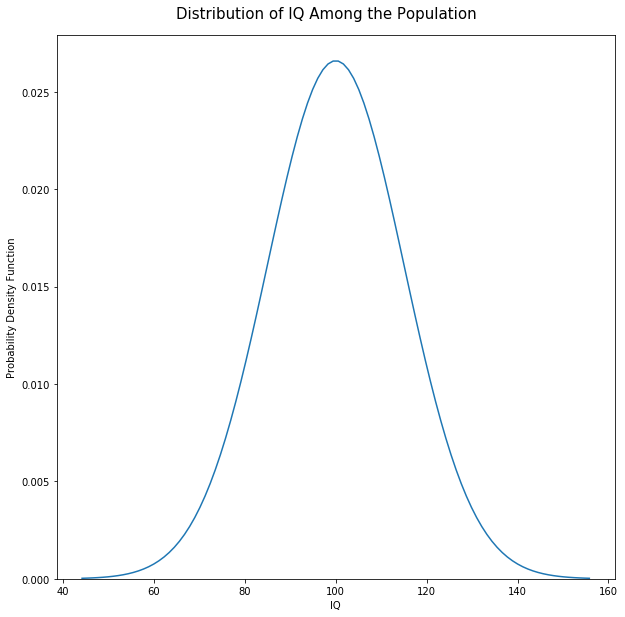

In [2]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=100, scale=15)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Population', fontsize=15, y=0.92)

hide_toggle()

* Say I wanted to see whether a given person, given their IQ, could conceiveably come from this stated distribution.
* There are two levers we could pull to make that judgment.
    * 1. Is this a one-sided test or a two-sided test?
        Do we care about whether this person is **smarter than** the given population, **dumber than** the given population, or just **different than** the given population?
    * 2. What signifiance level will we choose?
        What is the chance that we are willing to put up with a false positive?

Say we want to test whether the person is **different from** the given population. 

We can test this with a two-sided test with a significance level of 0.05.

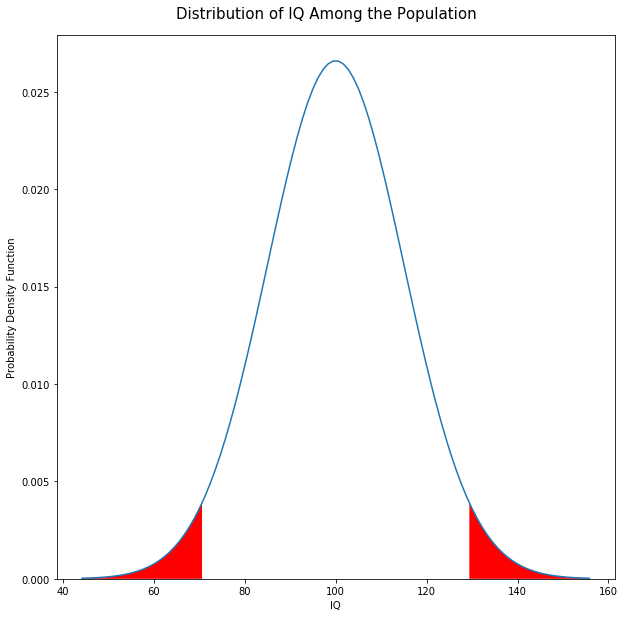

In [3]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=100, scale=15)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
#Fill in Region between 0th and 2.5th percentile here
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
#Fill in Region between 97.5th and 100th percentile here
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Population', fontsize=15, y=0.92)

hide_toggle()

We will **reject the null hypothesis** that a person comes from the underlying distribution if they are in either of the rejection regions. There is a **5% chance** this will happen if the null hypothesis is true.

Say we want to test whether the person is **different from** the given population. 

We can also test this with a two-sided test with a significance level of **0.01**.

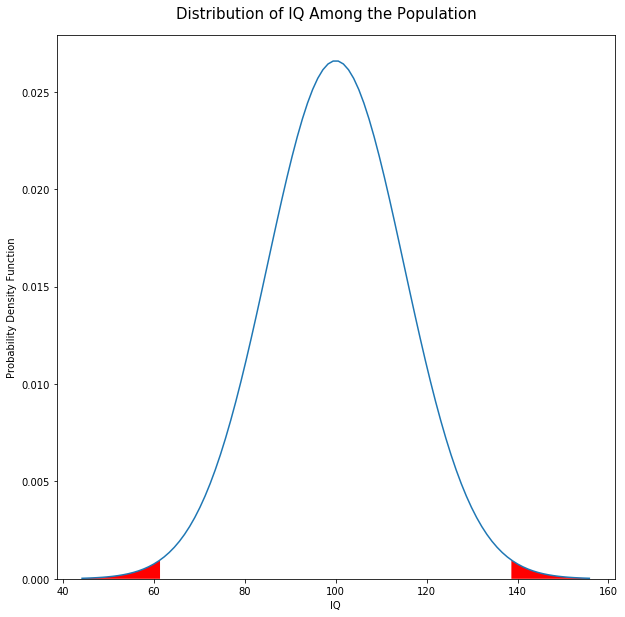

In [4]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=100, scale=15)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
#Fill in Region between 0th and 0.5th percentile here
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.005))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
#Fill in Region between 99.5th and 100th percentile here
X_fill = np.linspace(dist.ppf(0.995), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Population', fontsize=15, y=0.92)

hide_toggle()

We will **reject the null hypothesis** that a person comes from the underlying distribution if they are in either of the rejection regions. There is a **1% chance** this will happen if the null hypothesis is true.

Say we want to test whether the person is **smarter than** the given population. 

We can test this with a one-sided test with a significance level of 0.05.

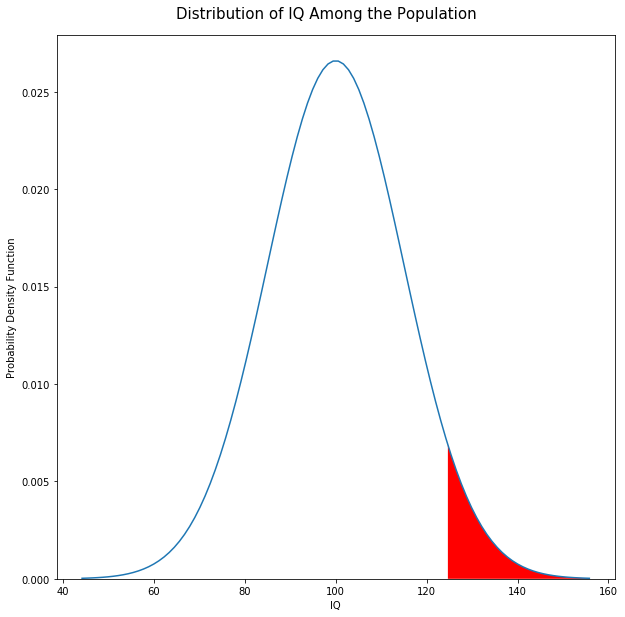

In [5]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=100, scale=15)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
#Fill in Region between 95th and 100th percentile here
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Population', fontsize=15, y=0.92)

hide_toggle()

We will **reject the null hypothesis** that a person comes from the underlying distribution if they are in the rejection region. There is a **5% chance** this will happen if the null hypothesis is true.

Say we want to test whether the person is **smarter than** the given population. 

We can also test this with a one-sided test with a significance level of **0.01**.

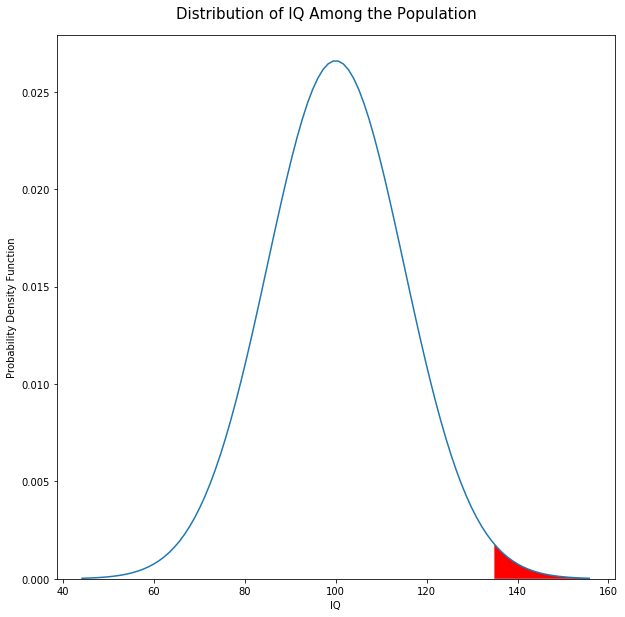

In [6]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=100, scale=15)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
#Fill in Region between 95th and 100th percentile here
X_fill = np.linspace(dist.ppf(0.99), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Population', fontsize=15, y=0.92)

hide_toggle()

We will **reject the null hypothesis** that a person comes from the underlying distribution if they are in the rejection region. There is a **1% chance** this will happen if the null hypothesis is true.

Say we want to test whether the person is **dumber than** the given population. 

We can test this with a one-sided test with a significance level of 0.05.

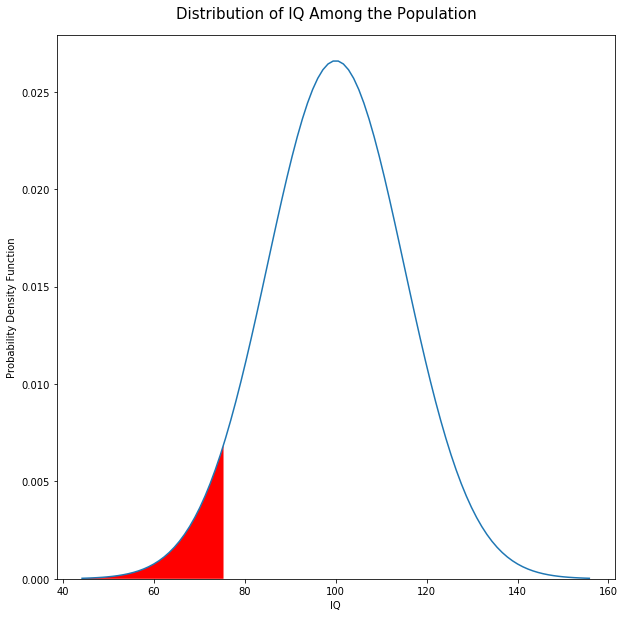

In [7]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=100, scale=15)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
#Fill in Region between 0th and 5th percentile here
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.05))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Population', fontsize=15, y=0.92)

hide_toggle()

We will **reject the null hypothesis** that a person comes from the underlying distribution if they are in the rejection region. There is a **5% chance** this will happen if the null hypothesis is true.

Say we want to test whether the person is **dumber than** the given population. 

We can also test this with a one-sided test with a significance level of **0.01**.

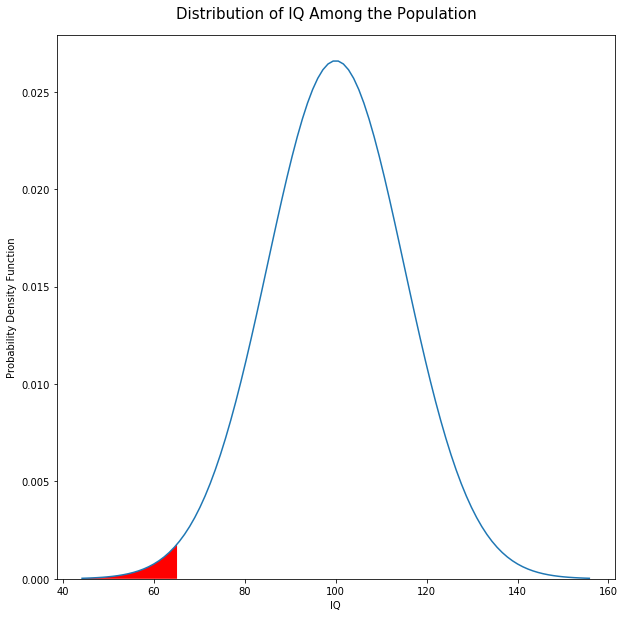

In [8]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=100, scale=15)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
#Fill in Region between 0th and 1st percentile here
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.01))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Population', fontsize=15, y=0.92)

hide_toggle()

We will **reject the null hypothesis** that a person comes from the underlying distribution if they are in the rejection region. There is a **1% chance** this will happen if the null hypothesis is true.

# One-Sample T-Test

* A **one-sample t-test** follows the structure of a Z-test, but rather than use a **normal distribution** for the assumed underlying distribution, it uses a T-distribution.
* It is used when the underlying distribution either has less than 30 samples, or the variance of the underlying distribution is unknown.
* In either case, it is still assumed that the underlying distribution is normal. We are essentially widening the underlying distribution (higher standard deviation than a normal distribution) due to our uncertainty of it (either due to an unknown variance or a small sample size in the underlying distribution.

# One-Sample T-Test
* We can estimate the variance (and standard deviation) using our observed samples.

In [9]:
samples = [112, 94, 116, 140, 91, 91, 142, 119, 85]
print('Sample Standard Deviation:', np.round(np.std(samples, ddof=1), 2))

Sample Standard Deviation: 21.35


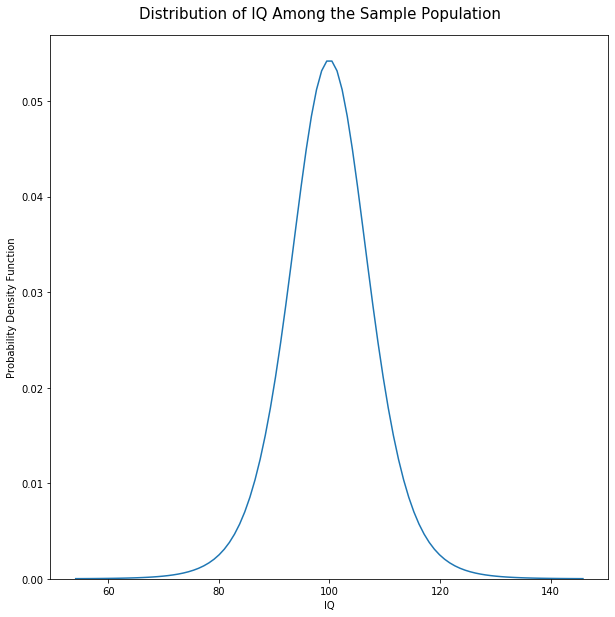

In [10]:
fig = plt.figure(figsize=(10,10))
dist = stats.t(loc=100, scale=np.std(samples, ddof=1)/np.sqrt(9), df=8)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Sample Population', fontsize=15, y=0.92)

hide_toggle()

Say we want to test whether this group is **different from** the given population. 

We can test this with a two-sided test with a significance level of 0.05.

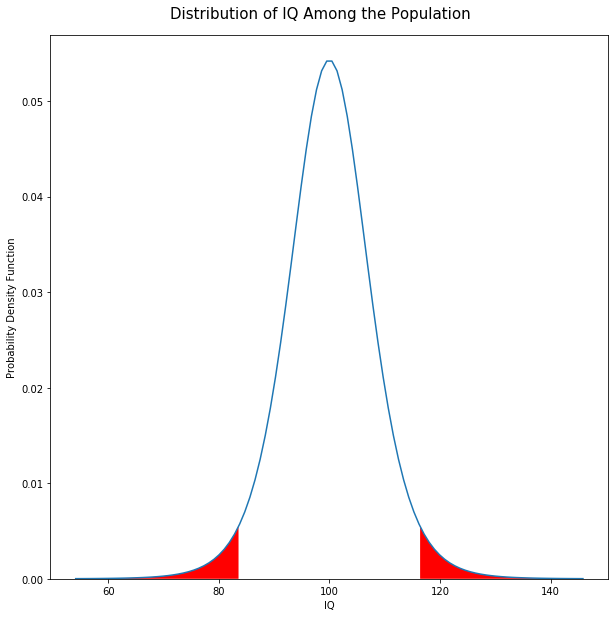

In [11]:
fig = plt.figure(figsize=(10,10))
dist = stats.t(loc=100, scale=np.std(samples, ddof=1)/np.sqrt(9), df=8)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
#Fill in Region between 0th and 2.5th percentile here
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
#Fill in Region between 97.5th and 100th percentile here
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Population', fontsize=15, y=0.92)

hide_toggle()

We will **reject the null hypothesis** that this group comes from the underlying distribution if the mean value is in either of the rejection regions. There is a **5% chance** this will happen if the null hypothesis is true.

# Two-Sample T-Test

* What if we want to compare the means of two separate samples?
* We can do a **two-sample t-test** to do this.
* Let's say we want to see if I am statistically running a faster mile in 2019 than I was in 2018.

In [12]:
#Measured in Seconds
miles_2018 = [470, 444, 476, 511, 441, 441, 513, 481, 431, 472]
miles_2019 =  [420, 394, 426, 461, 395, 395, 463, 431, 381, 422]

# Two-Sample T-Test

* The two-sample t-test depends on a few assumptions:
    * Both samples are drawing from **normal distributions** with unknown mean and variance.
    * The variance of both samples are **the same**.
* The null hypothesis is that the difference between the two sample means equal a certain value.
    * Often, that value is 0.
* Much like a one-sample test, the alternate hypothesis could be two-sided or one-sided with a differing signifiance level.

In [13]:
#Measured in Seconds
miles_2018 = [470, 444, 476, 511, 441, 441, 513, 481, 431, 472]
miles_2019 = [420, 394, 426, 461, 395, 395, 463, 431, 381, 422]
print('Mean of 2018 mile times:', np.round(np.mean(miles_2018),2), 'seconds')
print('Variance of 2018 mile times:', np.round(np.var(miles_2018),2), 'seconds')
print('Mean of 2019 mile times:', np.round(np.mean(miles_2019),2), 'seconds')
print('Variance of 2019 mile times:', np.round(np.var(miles_2019),2), 'seconds')
print('Difference in Means:', np.round(np.mean(miles_2019) - np.mean(miles_2018),2), 'seconds')

Mean of 2018 mile times: 468.0 seconds
Variance of 2018 mile times: 753.0 seconds
Mean of 2019 mile times: 418.8 seconds
Variance of 2019 mile times: 712.36 seconds
Difference in Means: -49.2 seconds


# Two-Sample T-Test

* Because we are assuming that both samples have the same variance, we can come up with a *pooled variance* that takes into account both of our sample variances
* With a pooled variance, we do not need to divide the sample variance by the length of the dataset like we would for a one-sample t-test.

$$t=\frac{\bar{x}_{1}-\bar{x}_{2}}{\sqrt{s^{2}\left(\frac{1}{n_{1}}+\frac{1}{n_{2}}\right)}}$$
$$s^{2}=\frac{\sum_{i=1}^{n_{1}}\left(x_{i}-\bar{x}_{1}\right)^{2}+\sum_{j=1}^{n_{2}}\left(x_{j}-\bar{x}_{2}\right)^{2}}{n_{1}+n_{2}-2}$$

In [49]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))
pooled_var = custom_pooled_variance(miles_2018, miles_2019)
print('Pooled Variance:', np.round(pooled_var, 2))
print('Pooled Standard Deviation:', np.round(np.sqrt(pooled_var), 2))

Pooled Variance: 162.82
Pooled Standard Deviation: 12.76


# Two-Sample T-Test

* Now we can build a t-distribution with a mean of 0, a standard deviation of 12.76, and 18 degrees of freedom (the length of our combined dataset minus two, since we are comparing two datasets)
* Now we can evalute our test using a rejection region, just like a regular hypothesis test!

# Two-Sample T-Test

* Our **null hypothesis** is that my mean running times in 2019 were the same as they were in 2018.
* Our **alternate hypothesis** is that my mean running times in 2019 were *less* than they were in 2018.
* This means that this will be a **one-sided test**. We'll run it at a signifiance level of 0.05.

Rejection Region: Less than -22.13


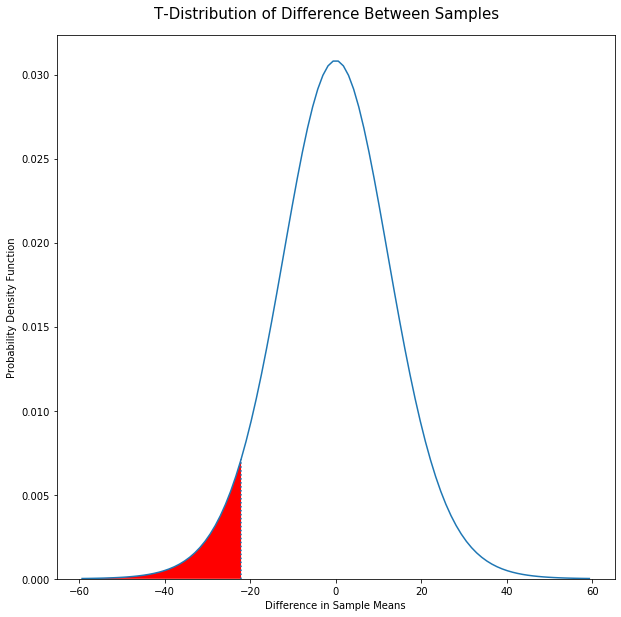

In [94]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_var), df=18)
print('Rejection Region: Less than', np.round(dist.ppf(0.05), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.05), dist.ppf(0.05)],[0, dist.pdf(dist.ppf(0.05))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.05))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize=15, y=0.92)

hide_toggle()

If my average running time in 2019 is 22.18 seconds or more less than my average running time in 2018, I can reject the null hypothesis that my average running time in 2019 was the same as my average running time in 2018 in favor of the alternate hypothesis that my average running time in 2019 was *lower* than my average running time in 2019.

Indeed, I can reject the null hypothesis here since my average running time in 2019 was 49.2 seconds less than my average running time in 2018.

In [97]:
#p-value
dist.cdf(-49.2)

0.0005790271288511914

# ANOVA Test

* The ANOVA test is similar to the two-sample t-test but for more than two-samples.
* It is a test to see if the population means from all of these groups are the same.
* It also assumes that all samples have the same variance.

# ANOVA Test

* Our null hypothesis is that my mean running times in 2017, 2018, 2019 were all the same.
* Our alternate hypothesis is that my mean running times in 2017, 2018, and 2019 were *not* all the same.
* This will be a **one-sided test**, using the **F-distribution** rather than the **T distribution**.

In [99]:
#Measured in Seconds
miles_2017 = [458, 447, 462, 470, 428, 426, 445, 423, 454, 446]
miles_2018 = [470, 444, 476, 511, 441, 441, 513, 481, 431, 472]
miles_2019 = [420, 394, 426, 461, 395, 395, 463, 431, 381, 422]
print('Mean of 2017 mile times:', np.round(np.mean(miles_2017),2), 'seconds')
print('Mean of 2018 mile times:', np.round(np.mean(miles_2018),2), 'seconds')
print('Mean of 2019 mile times:', np.round(np.mean(miles_2019),2), 'seconds')

Mean of 2017 mile times: 445.9 seconds
Mean of 2018 mile times: 468.0 seconds
Mean of 2019 mile times: 418.8 seconds


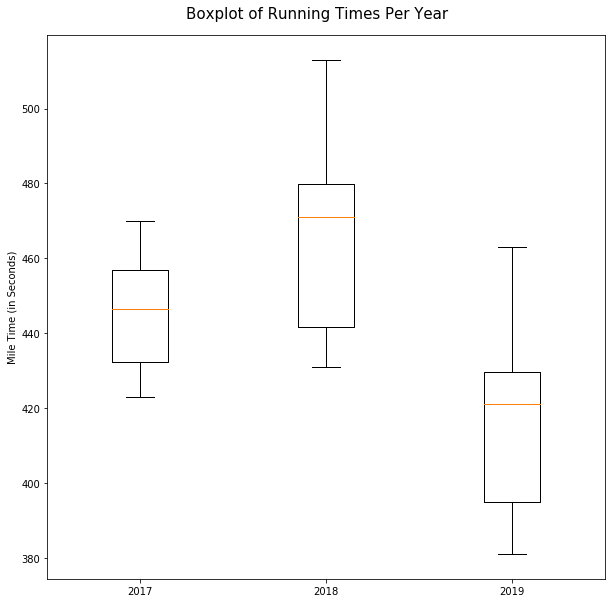

In [63]:
fig = plt.figure(figsize=(10,10))
plt.ylabel('Mile Time (in Seconds)')
fig.suptitle('Boxplot of Running Times Per Year', fontsize=15, y=0.92)
plt.boxplot([miles_2017, miles_2018, miles_2019], labels=['2017', '2018', '2019'])

hide_toggle()

We can visualize the rejection region of the **F-distribution** for our test.

Rejection Region: Greater than 3.35


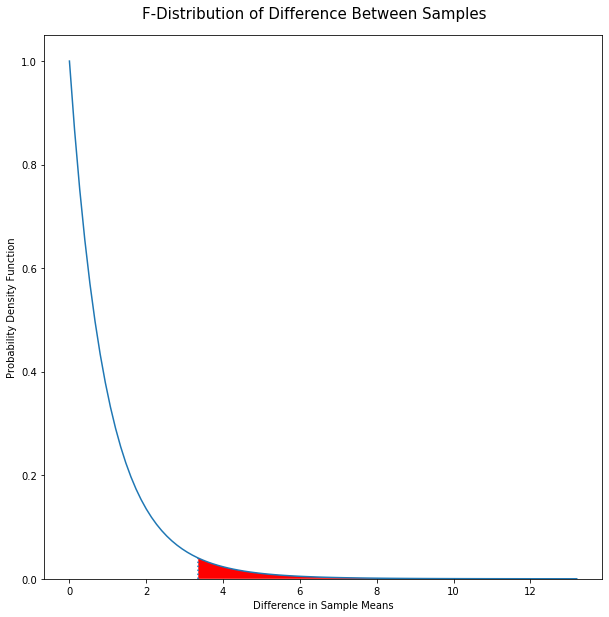

In [83]:
dist = stats.f(dfn=2, dfd = 27)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('F-Distribution of Difference Between Samples', fontsize=15, y=0.92)

hide_toggle()

In [86]:
F, p = stats.f_oneway(miles_2017, miles_2018, miles_2019)
print('F-statistic:', np.round(F, 2))
print('p-value:', np.round(p, 2))

F-statistic: 9.67
p-value: 0.0


In [75]:
#Manual P-Value
1 - stats.f(dfn=2, dfd = 27).cdf(9.673758739711474)

0.000679287116705507

Here, we can reject the null hypothesis, as our F-value is 9.67, much higher than the rejection region cutoff of 3.35 with a p-value of close to 0.

Again, the ANOVA test only calculates whether **one** of our samples has a different mean than the others. Since we already know that 2018 and 2019 have a statistically significant difference in means, it makes sense that we can also reject the null hypothesis of our ANOVA test.

# Bootstrap Sampling

* So far our hypothesis testing has been very strict about the assumptions of the original distribution.
* The original distributions must be normal and the variances must be equal.
* **Bootstrap testing** is a way of expanding what we can test via simulation, and will be useful for any hypothesis testing you do independently.
* It is a new method that is remarkably simple, but only recently possible due to an increase in computing power.

## Bootstrap Sampling

* Bootstrap sampling takes the same premise as what we formally do with a hypothesis test. Given that the null hypothesis is true, what are the odds of our outcome happening?

* If we had twenty samples and randomly re-arranged and then split them, what are the odds that the difference in the two lists would be equal to the difference we found?

In [16]:
miles_2018 = [470, 444, 476, 511, 441, 441, 513, 481, 431, 472]
miles_2019 = [420, 394, 426, 461, 395, 395, 463, 431, 381, 422]
print('2018 Real Miles Ran', miles_2018)
print('2019 Real Miles Ran', miles_2019)
total = miles_2018 + miles_2019
np.random.seed(42)
np.random.shuffle(total)
miles_2018_sample = total[:(len(miles_2018))]
miles_2019_sample = total[(len(miles_2018)):]
print('2018 Simulated Miles Ran: ', miles_2018_sample)
print('2019 Simulated Miles Ran: ', miles_2019_sample)
print('Difference in Means:', np.round(np.mean(miles_2019_sample) - np.mean(miles_2018_sample),2), 'seconds')



2018 Real Miles Ran [470, 444, 476, 511, 441, 441, 513, 481, 431, 472]
2019 Real Miles Ran [420, 394, 426, 461, 395, 395, 463, 431, 381, 422]
2018 Simulated Miles Ran:  [470, 431, 395, 444, 431, 441, 394, 511, 381, 463]
2019 Simulated Miles Ran:  [461, 476, 472, 422, 441, 426, 481, 420, 395, 513]
Difference in Means: 14.6 seconds


We can due this 10,000 times to get a simulated distribution, and then see how many times we saw a difference in our samples of -49.2 or less.

In [17]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = miles_2018 + miles_2019
    np.random.shuffle(total)
    new_a = total[:len(miles_2018)]
    new_b = total[len(miles_2018):]
    diff.append(np.mean(new_b) - np.mean(new_a))

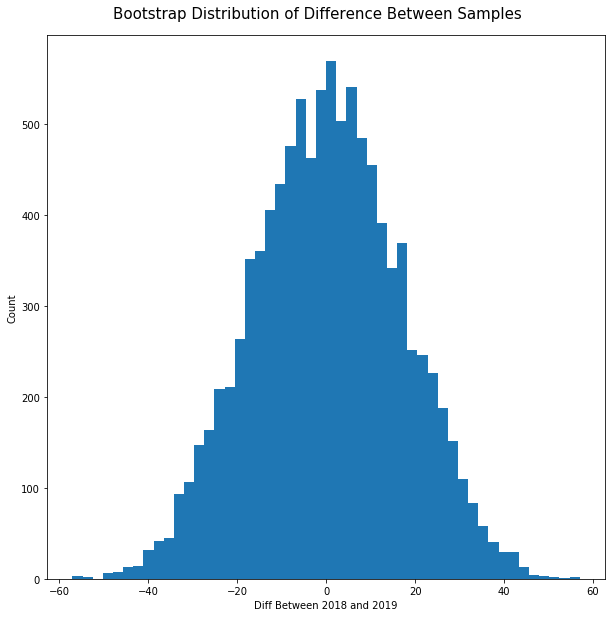

In [18]:
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between 2018 and 2019')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Samples', fontsize=15, y=0.92)

hide_toggle()

We can use the numpy 'percentile' function to find the percentile ranks in a given array. Here, because we are doing a one-sided test at a significance level of 0.05, we want to see what value is at the 5th percentile of our list, and reject our value if it is lower than that.

In [19]:
#Note that 5 is an integer here meaning 5th percentile
np.percentile(diff, 5)

-27.400000000000034

We'll reject our null hypothesis if our value is less than -27.4.

In [20]:
np.array(diff)[np.array(diff) <= -49.2]

array([-52.6, -49.8, -55.2, -57. , -53. , -57. ])

Only six out of our 10,000 simulations have a score less than or equal to -49.2.

In [21]:
stats.percentileofscore(diff, -49.2)

0.06

Note that the percentile value is 0.06 (both np.percentile and stats.percentileofscore use 0-100 rather than 0-1) - specifically there are 6 random values out of 10,000 generated that are less than 10,000

# Chi-Square Test for Goodness of Fit

* Last week, we looked at identifying rejection regions for a series of coin flips to determine whether the coin was fair or not.
* We were able to manually create rejection regions because we knew the PMF values for a binomial distribution with ten trials and a 50% probability of success for each trial.
* What if we didn't know what the underlying distribution was?

# Chi-Square Test for Goodness of Fit

* We can do a **chi-square test for the goodness of fit** that evaluates the observed results of a discrete outcome versus the expected results.
* Specifically, we calculate the sum of the squared differences between each observed and expected value divided by the expected value. This is called **Pearson's Chi-Square statistic**.
* We can see if that value fits the rejection region for a **chi-square distribution** with the given number of degrees of freedom.
* The chi-square test will have (n - 1) degrees of freedom, where n is the number of discrete outcomes in the distribution.

# Chi-Square Test for Goodness of Fit

* Here, the null hypothesis is that the observed values come from the listed distribution.
* The alternate hypothesis is that the observed values come from another distribution.
* If it's in the rejection region, we **reject the null hypothesis** that the observed values come from the listed distribution.

# Chi-Square Test for Goodness of Fit

* Say I roll a pair of dice 100 times. How will I know if it's fair or unfair?
* Below are the PMFs of each discrete outcome from a dice roll.

In [22]:
expected_results = []
for i in range(1,7):
    for j in range(1,7):
        total = i + j
        expected_results.append(total)
expected_values, expected_counts = np.unique(expected_results, return_counts=True)
print('PMFs of One Dice Roll')
np.transpose((expected_values, expected_counts/np.sum(expected_counts)))

PMFs of One Dice Roll


array([[ 2.        ,  0.02777778],
       [ 3.        ,  0.05555556],
       [ 4.        ,  0.08333333],
       [ 5.        ,  0.11111111],
       [ 6.        ,  0.13888889],
       [ 7.        ,  0.16666667],
       [ 8.        ,  0.13888889],
       [ 9.        ,  0.11111111],
       [10.        ,  0.08333333],
       [11.        ,  0.05555556],
       [12.        ,  0.02777778]])

# Chi-Square Test for Goodness of Fit

* And below are the number of expected times each discrete outcome will occur in one-hundred dice rolls.

In [23]:
expected_results = []
for i in range(1,7):
    for j in range(1,7):
        total = i + j
        expected_results.append(total)
expected_values, expected_counts = np.unique(expected_results, return_counts=True)
expected_counts_100 = 100 * (expected_counts/np.sum(expected_counts))
print('Expected Results of One-Hundred Dice Rolls')
np.transpose((expected_values, expected_counts_100))

Expected Results of One-Hundred Dice Rolls


array([[ 2.        ,  2.77777778],
       [ 3.        ,  5.55555556],
       [ 4.        ,  8.33333333],
       [ 5.        , 11.11111111],
       [ 6.        , 13.88888889],
       [ 7.        , 16.66666667],
       [ 8.        , 13.88888889],
       [ 9.        , 11.11111111],
       [10.        ,  8.33333333],
       [11.        ,  5.55555556],
       [12.        ,  2.77777778]])

# Chi-Square Test for Goodness of Fit

* And below we'll simulate the results of 100 dice rolls by picking a random outcome between 2 and 12 100 times.

In [24]:
np.random.seed(42)
observed_results = np.random.randint(2,13, size=100)
observed_values, observed_counts = np.unique(observed_results, return_counts=True)
np.transpose((observed_values, observed_counts))

array([[ 2,  7],
       [ 3, 10],
       [ 4,  9],
       [ 5,  9],
       [ 6, 10],
       [ 7,  6],
       [ 8,  9],
       [ 9, 14],
       [10, 10],
       [11,  9],
       [12,  7]])

# Chi-Square Statistic

* We calculate the sum of the squared differences between each observed and expected value divided by the expected value. This is called Pearson's Chi-Square statistic.

$$X^{2}=\sum \frac{\left(O_{i}-E_{i}\right)^{2}}{E_{i}}$$

In [100]:
expected = pd.DataFrame(np.transpose((expected_values, expected_counts_100)))
observed = pd.DataFrame(np.transpose((observed_values, observed_counts)))
expected.columns = ['outcome', 'expected_value']
observed.columns = ['outcome', 'observed_value']
combined = expected.merge(observed, on='outcome')
combined['diff_squared'] = np.power(combined['observed_value'] - combined['expected_value'], 2)
combined['diff_over_expected'] = combined['diff_squared'] / combined['expected_value']
print('Chi-Square Statistic:',combined['diff_over_expected'].sum())
combined

Chi-Square Statistic: 29.702


,outcome,expected_value,observed_value,diff_squared,diff_over_expected
0,2.0,2.777778,7,17.827160,6.417778
1,3.0,5.555556,10,19.753086,3.555556
2,4.0,8.333333,9,0.444444,0.053333
3,5.0,11.111111,9,4.456790,0.401111
4,6.0,13.888889,10,15.123457,1.088889
5,7.0,16.666667,6,113.777778,6.826667
6,8.0,13.888889,9,23.901235,1.720889
7,9.0,11.111111,14,8.345679,0.751111
8,10.0,8.333333,10,2.777778,0.333333
9,11.0,5.555556,9,11.864198,2.135556


Comparing the difference in these two arrays gives us a **Chi-Square statistic** of 29.702, which we can also manually compute.

In [26]:
stats.chisquare(observed_counts, expected_counts_100)

Power_divergenceResult(statistic=29.702, pvalue=0.0009582277855238355)

We can also manually build out the chi-square distribution at 10 degrees of freedom to see where the rejection region is.

Rejection Region: Greater than 18.31


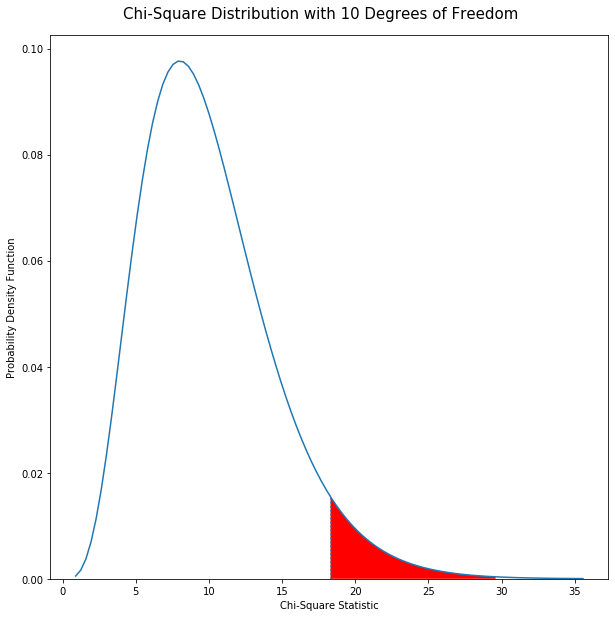

In [91]:
dist = stats.chi2(df=10)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

hide_toggle()

In [28]:
#Rejection Region for a Chi-Square distribution with 10 degrees of freedom
dist.ppf(0.95)

18.307038053275146

In [29]:
#P-Value
1 - dist.cdf(29.702)

0.0009582277855237908

# Chi-Square Test for Homogeneity

* Another chi-square test involves testing multiple independent different data sets to see if they are drawn from the same discrete distribution
* Here, the null hypothesis is that each dataset is drawn from the same distribution
* The alternate hypothesis is that each dataset is not drawn from the same distribution.


# Chi-Square Test for Homogeneity

* Essentially, we will find the expected values for all of the datasets, assuming they’re drawn from the same distribution, and do a chi-squared test on it, similar to how we did for the goodness of fit test.
* The chi-square test will have (n - 1) * (m-1) degrees of freedom, where n is the number of observations in each distribution, and m is the number of distributions.

# Chi-Square Test for Homogeneity

* Say that someone claims that parents with a higher attainment of education are more likely to have their children get vaccinated
* Below is a small dataset looking at the count of children vaccinated in a study broken down by the parents' level of education attainment.

|   |Vaccinated   |Not Vaccinated   |
|---|---|---|
|Post-Graduate Degree   |  26,188 |  5,856 |
| College Degree  |  6,776 |  14,599 |
|  < College Degree |  335,998 |  76,193 |

# Chi-Square Test for Homogeneity

* The null hypothesis is that both vaccinated and non-vaccinated children have parents drawn from the same distribution of educational attainment.
* The alternate hypothesis is that vaccinated and non-vaccinated children do not have parents drawn from the same distribution of educational attainment.
* Note that here there are many more vaccinated children than non-vaccinated children in the dataset - that is OK and the test is designed to account for that.

In [30]:
observations_vaccinated = [26118, 67776, 335998]
observations_nonvaccinated = [5856, 14599, 76193]
total_observed = [observations_vaccinated[i] + observations_nonvaccinated[i] for i in range(len(observations_vaccinated))]
expected_rate = [total_observed[i] / (np.sum(observations_vaccinated) + np.sum(observations_nonvaccinated)) for i in range(len(observations_vaccinated))]
df = pd.DataFrame()
df['observations_vaccinated'] = observations_vaccinated
df['observations_nonvaccinated'] = observations_nonvaccinated
df['total_observed'] = total_observed
df['expected_rate'] = expected_rate
df['expectations_vaccinated'] = df['expected_rate'] * df['observations_vaccinated'].sum()
df['expectations_nonvaccinated'] = df['expected_rate'] * df['observations_nonvaccinated'].sum()
df

,observations_vaccinated,observations_nonvaccinated,total_observed,expected_rate,expectations_vaccinated,expectations_nonvaccinated
0,26118,5856,31974,0.060725,26105.076173,5868.923827
1,67776,14599,82375,0.156446,67254.821096,15120.178904
2,335998,76193,412191,0.782829,336532.102731,75658.897269


In [31]:
df_all = pd.DataFrame()
df_all['observed_value'] = np.hstack([df['observations_vaccinated'], df['observations_nonvaccinated']])
df_all['expected_value'] = np.hstack([df['expectations_vaccinated'], df['expectations_nonvaccinated']])
df_all['diff'] = np.power(df_all['observed_value'] - df_all['expected_value'], 2)
df_all['diff_over_expected']= df_all['diff'] / df_all['expected_value']
print('Chi-Square Statistic:', df_all['diff_over_expected'].sum())
df_all.index = ['Vaccinated + Post-College', 'Vaccinated + College', 'Vaccinated + Less', 'Nonvaccinated + Post-College', 'Nonvaccinated + College', 'Nonvaccinated + Less']
df_all

Chi-Square Statistic: 26.656285207184467


,observed_value,expected_value,diff,diff_over_expected
Vaccinated + Post-College,26118,26105.076173,167.025311,0.006398
Vaccinated + College,67776,67254.821096,271627.449753,4.038780
Vaccinated + Less,335998,336532.102731,285265.727301,0.847663
Nonvaccinated + Post-College,5856,5868.923827,167.025311,0.028459
Nonvaccinated + College,14599,15120.178904,271627.449753,17.964566
Nonvaccinated + Less,76193,75658.897269,285265.727301,3.770419


In [32]:
stats.chi2_contingency([[26118, 67776, 335998], [5856, 14599, 76193]])

(26.656285207184467,
 1.6280255382971824e-06,
 2,
 array([[ 26105.07617275,  67254.82109621, 336532.10273104],
        [  5868.92382725,  15120.17890379,  75658.89726896]]))

Rejection Region: Greater than 5.99


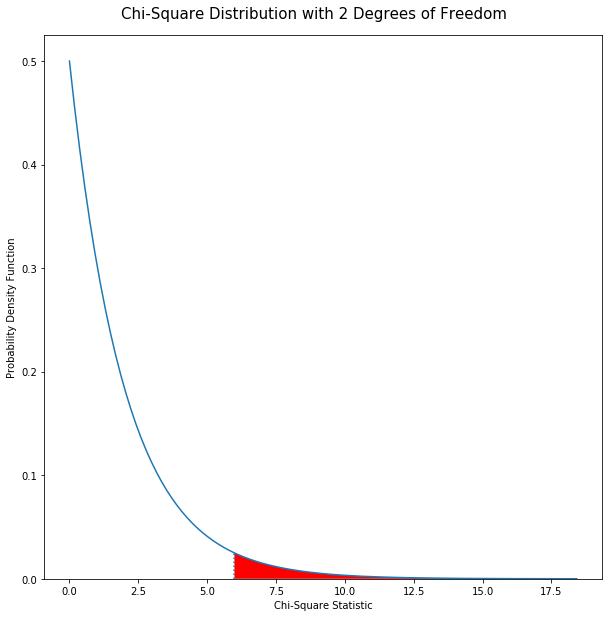

In [103]:
dist = stats.chi2(df=2)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 2 Degrees of Freedom', fontsize=15, y=0.92)

hide_toggle()

In [104]:
#Rejection Region for a Chi-Square distribution with 2 degrees of freedom
dist.ppf(0.95)

5.991464547107979

In [35]:
#P-Value
1 - dist.cdf(26.656285207496772)

1.6280255380474173e-06

# We Covered A Lot Today!!

If you are testing for the difference in means between continuous distributions:  
* Two-Sample T-Test if the underlying distribution is assumed normal and the variance between the two distributions is assumed to be the same
* Bootstrap test if either of these assumptions don't apply (or if they do!)
* ANOVA test if you want to test the difference in means for more than two distributions
    
If you are testing for whether discrete distributions are different:
*  Chi-Square Test for Goodness of Fit to test between an expected distribution and an observed one
*  Chi-Square Test for Homogenity to test whether two or more series of observed discrete values could conceivably come from the same distribution.

# Other Things We Didn't Cover

* Two-Sample T-Test with *unequal* variance - there is a different formula for unpooled variance or you can use bootstrapping
* ANOVA test with *unequal* variance - there is a different formula for unpooled variance or you can use bootstrapping
* If you think you'll need either of these for your project, talk to me and we'll figure out a solution.